In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Gold_Price_Data/gld_price_data.csv")
df.sample(20)

,Date,SPX,GLD,USO,SLV,EUR/USD
1848,5/12/2016,2064.110107,121.160004,11.450000,16.219999,1.137695
720,4/7/2011,1333.510010,142.509995,43.990002,38.730000,1.430206
694,3/1/2011,1306.329956,140.029999,40.480000,33.869999,1.382151
924,3/12/2012,1371.089966,165.070007,40.700001,32.630001,1.312508
2056,4/19/2017,2338.169922,121.730003,10.620000,17.180000,1.071501
881,1/9/2012,1280.699951,156.500000,39.080002,28.129999,1.268038
1089,12/20/2012,1443.689941,159.729996,32.730000,29.000000,1.321528
928,3/16/2012,1404.170044,161.300003,41.029999,31.590000,1.307873
2016,2/16/2017,2347.219971,118.080002,11.410000,17.150000,1.060738
1966,12/5/2016,2204.709961,111.540001,11.350000,15.880000,1.058201


In [2]:
df.shape

(2290, 6)

In [3]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


<AxesSubplot:xlabel='GLD', ylabel='SLV'>

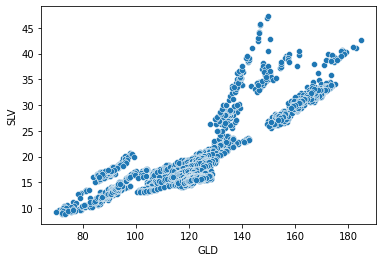

In [6]:
sns.scatterplot(x="GLD" , y="SLV",data=df)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

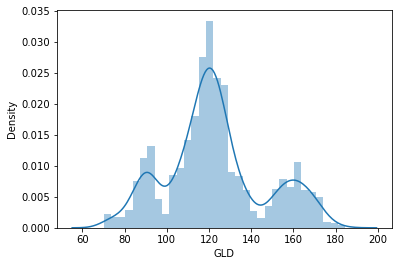

In [7]:
sns.distplot(df["GLD"])

<AxesSubplot:xlabel='GLD', ylabel='EUR/USD'>

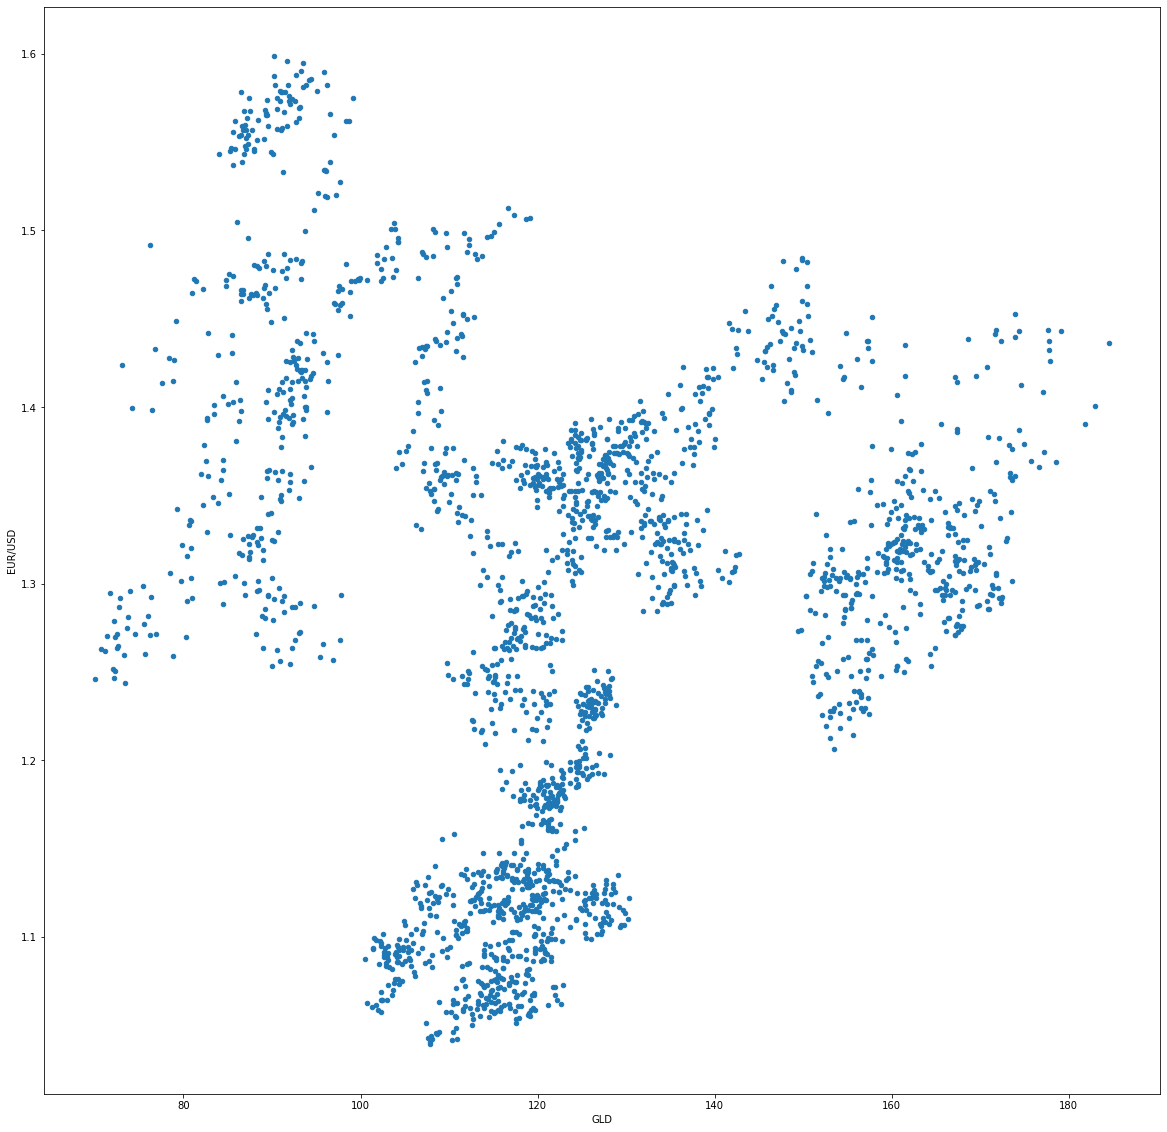

In [8]:
df.plot(x = "GLD" , y = "EUR/USD",kind = "scatter" , figsize = (20,20))

<AxesSubplot:>

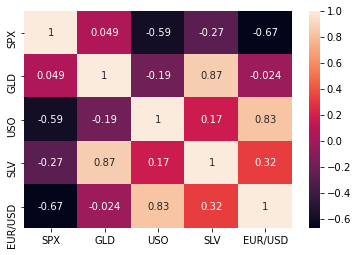

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [11]:
x = df.drop(["Date","GLD"],axis=1)

In [12]:
y= df["GLD"]

In [13]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [14]:

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

In [15]:

scalar = StandardScaler()
x_tr_scaled = scalar.fit_transform(x_train)

In [16]:

kf = KFold(n_splits=5)
rf = RandomForestRegressor()
params = { "n_estimators" : range(0,10),
         "criterion": ["mse", "mae"],
          "max_features" : ["auto", "sqrt", "log2"],
         "max_depth" : [10,30,50,100],
         "min_samples_split" : [2,4,8],
         "verbose" : [1,3,5]}
gs = GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1,cv=kf,verbose=3,return_train_score=True)
gs.fit(x_tr_scaled,y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.98382333 0.98126459 0.98306607]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.9937819  0.99350328 0.9938524 ]
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [10, 30, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': range(0, 10), 'verbose': [1, 3, 5]},
             return_train_score=True, verbose=3)

In [17]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 8,
 'verbose': 1}

In [18]:
gs.best_score_

0.9875481360527436

In [19]:
est = gs.best_estimator_

In [20]:
pickle.dump(est,open("Gold_price","wb"))

In [25]:
loaded_model = pickle.load(open("Gold_price", 'rb'))
result = loaded_model.score(scalar.transform(x_test), y_test)
y_pred = loaded_model.predict(scalar.transform(x_test))
print(result)

0.9817050285989933


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [28]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.5541831162663762
9.3850248901602
0.9817050285989933
